# In this notebook, we will mix the three sources of stock data together to study the relationship between bitcoin and stock price.

# Three sources of stock data: S&Q 500, NASDAQ and DowJoes

In [55]:
import pandas as pd

SQ500 = pd.read_csv(r"D:\^GSPC_S&P500.csv", header = 0, parse_dates=['Date'])
NASDAQ = pd.read_csv(r"D:\^IXIC_NASDAQComposite.csv", header = 0, parse_dates=['Date'])
Dowjoes = pd.read_csv(r"D:\^DJI_DowJonesIndustrialAverage.csv", header = 0, parse_dates=['Date'])

In [56]:
# rename for Adj Close column in each dataframes
SQ500 = SQ500.rename(index=str, columns={"Adj Close":"SQ500_adj"})
NASDAQ = NASDAQ.rename(index=str, columns={"Adj Close":"NASDAQ_adj"})
Dowjoes = Dowjoes.rename(index=str, columns={"Adj Close":"Dowjoes_adj"})

# Bitcoin data

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

bitcoin_data = pd.read_csv(r"D:\bitcoin_dataset.csv", header=0, parse_dates=['Date'])
bitcoin_data['Year'] = bitcoin_data['Date'].apply(lambda x: x.year)
bitcoin_data['Month'] = bitcoin_data['Date'].apply(lambda x: x.month)
bitcoin_data.head(3)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Year,Month
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0,2010,2
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0,2010,2
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0,2010,2


In [58]:
# merge the bitcoin data and stock price data

from functools import reduce


dfs = [bitcoin_data, SQ500, NASDAQ, Dowjoes]
merge = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
print(merge.shape)
merge.head(5)

(2013, 44)


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,Low_y,Close_y,NASDAQ_adj,Volume_y,Open,High,Low,Close,Dowjoes_adj,Volume
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,2205.699951,2213.439941,2213.439941,2310910000,10383.160156,10411.120117,10267.830078,10282.410156,10282.410156,190740000
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,2221.280029,2235.899902,2235.899902,2155810000,10284.000000,10393.509766,10283.929688,10374.160156,10374.160156,181450000
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,2198.729980,2234.219971,2234.219971,2300530000,10366.599609,10366.679688,10185.830078,10321.030273,10321.030273,242550000
3,2010-02-26,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,2222.229980,2238.260010,2238.260010,2283430000,10321.410156,10353.450195,10272.290039,10325.259766,10325.259766,282120000
4,2010-03-01,0.0,2162150.0,0.0,0.0,0.0,0.000228,0.0,1.0,0.0,...,2247.330078,2273.570068,2273.570068,2504940000,10326.099609,10413.990234,10326.099609,10403.790039,10403.790039,173750000


In [59]:
# Normalize the bitcoin market price and S&Q 500 stock price


merge['normalized_btc_market_price'] = (merge['btc_market_price'] - merge['btc_market_price'].mean()) / (merge['btc_market_price'].max() - merge['btc_market_price'].min())
merge['normalized_SQ500'] = (merge['SQ500_adj'] - merge['SQ500_adj'].mean()) / (merge['SQ500_adj'].max() - merge['SQ500_adj'].min())
merge['normalized_NASDAQ'] = (merge['NASDAQ_adj'] - merge['NASDAQ_adj'].mean()) / (merge['NASDAQ_adj'].max() - merge['NASDAQ_adj'].min())
merge['normalized_Dowjoes'] = (merge['Dowjoes_adj'] - merge['Dowjoes_adj'].mean()) / (merge['Dowjoes_adj'].max() - merge['Dowjoes_adj'].min())


In [60]:
btdata = pd.DataFrame({'btc_market_price':merge['normalized_btc_market_price'],'SQ500':merge['normalized_SQ500'],'NASDAQ':
                      merge['normalized_NASDAQ'],'Dowjoes':merge['normalized_Dowjoes']})
btdata.index = pd.DatetimeIndex(merge['Date'])
btdata.head(5)

,Dowjoes,NASDAQ,SQ500,btc_market_price
Date,,,,
2010-02-23,-0.327972,-0.347311,-0.367013,-0.046564
2010-02-24,-0.322553,-0.343162,-0.361262,-0.046564
2010-02-25,-0.325691,-0.343472,-0.362505,-0.046564
2010-02-26,-0.325441,-0.342726,-0.361667,-0.046564
2010-03-01,-0.320803,-0.336204,-0.355603,-0.046564


In [61]:
import numpy as np

# To calculate log return
btdata['shift_btc_market_price'] = btdata['btc_market_price'].shift(-1)
btdata['shift_SQ500'] = btdata['SQ500'].shift(-1)
btdata['shift_NASDAQ'] = btdata['NASDAQ'].shift(-1)
btdata['shift_Dowjoes'] = btdata['Dowjoes'].shift(-1)

# Calculate the log return for stock price and bitcoin market price
btdata['ln_return_btc_market_price'] = np.log(btdata['shift_btc_market_price']/btdata['btc_market_price'])
btdata['ln_return_SQ500'] = np.log(btdata['shift_SQ500']/btdata['SQ500'])
btdata['ln_return_NASDAQ'] = np.log(btdata['shift_NASDAQ']/btdata['NASDAQ'])
btdata['ln_return_Dowjoes'] = np.log(btdata['shift_Dowjoes']/btdata['Dowjoes'])
btdata.tail(3)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


,Dowjoes,NASDAQ,SQ500,btc_market_price,shift_btc_market_price,shift_SQ500,shift_NASDAQ,shift_Dowjoes,ln_return_btc_market_price,ln_return_SQ500,ln_return_NASDAQ,ln_return_Dowjoes
Date,,,,,,,,,,,,
2018-02-15,0.553171,0.584165,0.517497,0.479605,0.487516,0.518049,0.581032,0.554294,0.016360,0.001065,-0.005377,0.002028
2018-02-16,0.554294,0.581032,0.518049,0.487516,0.554136,0.509423,0.580079,0.539254,0.128086,-0.016790,-0.001642,-0.027509
2018-02-20,0.539254,0.580079,0.509423,0.554136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Extract ln return data for bitcoin market price and stock price
# Remove missing value and infinite value

data = btdata.loc[:,['ln_return_SQ500','ln_return_NASDAQ','ln_return_Dowjoes','ln_return_btc_market_price']]
data = data.rename(index=str, columns={"ln_return_SQ500":"SQ500","ln_return_NASDAQ":"NASDAQ","ln_return_Dowjoes":"Dowjoes",
                                      "ln_return_btc_market_price":"Bitcoin"})
data = data.replace([np.inf, -np.inf], np.nan).dropna()
data.head(5)

,SQ500,NASDAQ,Dowjoes,Bitcoin
Date,,,,
2010-02-23 00:00:00,-0.015792,-0.012017,-0.016662,0.0
2010-02-24 00:00:00,0.003435,0.000904,0.009682,0.0
2010-02-25 00:00:00,-0.002314,-0.002175,-0.000767,0.0
2010-02-26 00:00:00,-0.016909,-0.019213,-0.014355,0.0
2010-03-01 00:00:00,-0.003960,-0.003974,-0.000403,0.0


In [63]:
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data_1 = data[cols]
data_1.head(5)

,Bitcoin,SQ500,NASDAQ,Dowjoes
Date,,,,
2010-02-23 00:00:00,0.0,-0.015792,-0.012017,-0.016662
2010-02-24 00:00:00,0.0,0.003435,0.000904,0.009682
2010-02-25 00:00:00,0.0,-0.002314,-0.002175,-0.000767
2010-02-26 00:00:00,0.0,-0.016909,-0.019213,-0.014355
2010-03-01 00:00:00,0.0,-0.003960,-0.003974,-0.000403


In [64]:
# rename column
data_1 = data_1.rename(columns={'SQ500': 'S&P 500', 'Dowjoes': 'Dow Jones'})

In [65]:
# Make a VAR model

# The VAR model assumes that the passed time series are stationary.

import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

model = VAR(data)

In [66]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

model = VAR(data_1)

In [67]:
# Lag order selection

model.select_order(20)
results = model.fit(maxlags=20, ic='aic')
lag_order = results.k_ar

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -13.79       -13.78    1.024e-06       -13.79
1        -13.93       -13.88    8.896e-07       -13.91
2        -14.01       -13.91    8.210e-07       -13.97
3        -14.10      -13.95*    7.515e-07       -14.05
4        -14.12       -13.93    7.350e-07       -14.05
5        -14.13       -13.89    7.285e-07       -14.04
6        -14.20       -13.92    6.798e-07       -14.10
7        -14.25       -13.92    6.494e-07       -14.13
8        -14.30       -13.92    6.184e-07       -14.16
9        -14.30       -13.87    6.187e-07       -14.14
10       -14.31       -13.84    6.106e-07       -14.14
11       -14.33       -13.82    5.970e-07       -14.14
12       -14.34       -13.78    5.914e-07       -14.13
13       -14.35       -13.74    5.860e-07       -14.13
14       -14.38       -13.73    5.702e-07       -14.14
15       -

In [10]:
# Lag order selection

model.select_order(20)
results = model.fit(maxlags=20, ic='aic')
lag_order = results.k_ar

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -13.79       -13.78    1.024e-06       -13.79
1        -13.93       -13.88    8.896e-07       -13.91
2        -14.01       -13.91    8.210e-07       -13.97
3        -14.10      -13.95*    7.515e-07       -14.05
4        -14.12       -13.93    7.350e-07       -14.05
5        -14.13       -13.89    7.285e-07       -14.04
6        -14.20       -13.92    6.798e-07       -14.10
7        -14.25       -13.92    6.494e-07       -14.13
8        -14.30       -13.92    6.184e-07       -14.16
9        -14.30       -13.87    6.187e-07       -14.14
10       -14.31       -13.84    6.106e-07       -14.14
11       -14.33       -13.82    5.970e-07       -14.14
12       -14.34       -13.78    5.914e-07       -14.13
13       -14.35       -13.74    5.860e-07       -14.13
14       -14.38       -13.73    5.702e-07       -14.14
15       -

In [68]:
# From BIC, we can choose the lag order to be 9
# Impulse Response Analysis

result = model.fit(3)
# print summary for each variable
result.summary()

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Oct, 2019
Time:                     00:08:07
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -13.9887
Nobs:                     1968.00    HQIC:                  -14.0821
Log likelihood:           2792.23    FPE:                7.25579e-07
AIC:                     -14.1363    Det(Omega_mle):     7.06719e-07
--------------------------------------------------------------------
Results for equation Bitcoin
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.000283         0.004669           -0.061           0.952
L1.Bitcoin          -0.334014         0.022544          -14.816           0.000
L1.S&P 500          -0.109590         0.036054           -3.04

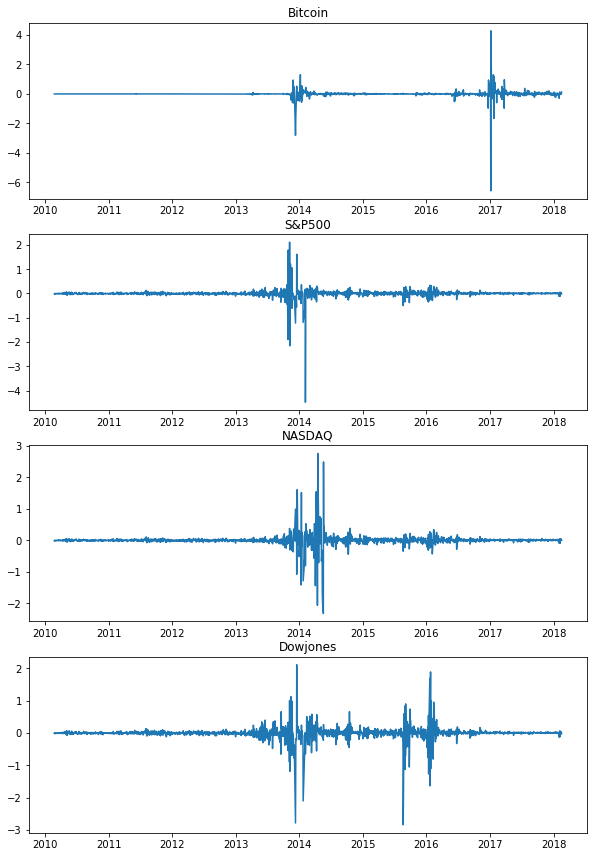

In [73]:
result.plot()
plt.subplots_adjust(top=1.25)
plt.show()

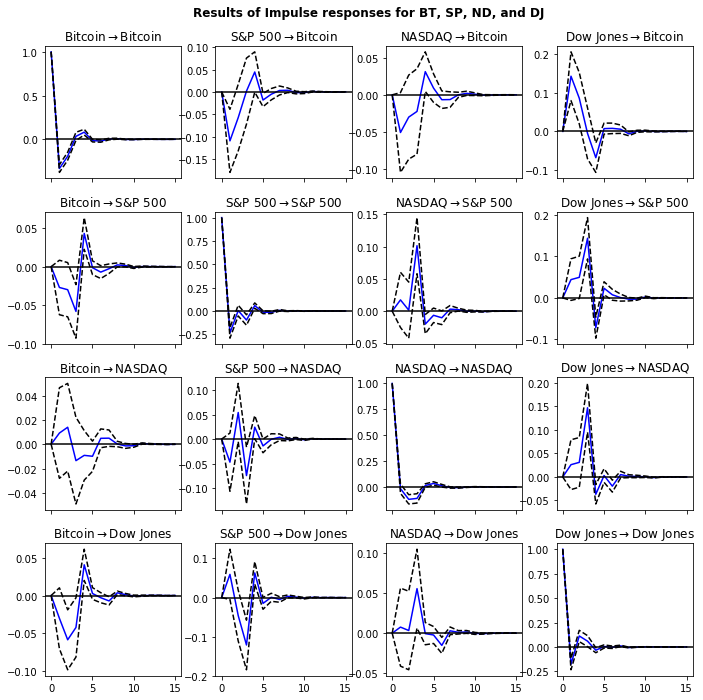

In [73]:
#plt.figure(figsize=(26, 24), dpi = 300)
irf = result.irf(15)
irf.plot(orth=False)
#plt.figure(figsize=(26, 24), dpi = 300)
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.suptitle('Results of Impulse responses for BT, SP, ND, and DJ', fontweight='bold')
plt.savefig(r"D:\fig3.tiff", dpi = 300)
plt.show()

# Error variance decomposition

In [24]:
fevd = result.fevd(40)
fevd.summary()

FEVD for Bitcoin
       Bitcoin     SQ500    NASDAQ   Dowjoes
0     1.000000  0.000000  0.000000  0.000000
1     0.989973  0.000215  0.000884  0.008928
2     0.986884  0.000213  0.001150  0.011753
3     0.986564  0.000240  0.001448  0.011748
4     0.984349  0.000245  0.001807  0.013599
5     0.984213  0.000309  0.001861  0.013617
6     0.984173  0.000310  0.001880  0.013638
7     0.984122  0.000328  0.001899  0.013651
8     0.984106  0.000329  0.001899  0.013666
9     0.984103  0.000329  0.001902  0.013666
10    0.984102  0.000329  0.001902  0.013667
11    0.984102  0.000329  0.001902  0.013667
12    0.984102  0.000329  0.001902  0.013667
13    0.984102  0.000329  0.001902  0.013667
14    0.984102  0.000329  0.001902  0.013667
15    0.984102  0.000329  0.001902  0.013667
16    0.984102  0.000329  0.001902  0.013667
17    0.984102  0.000329  0.001902  0.013667
18    0.984102  0.000329  0.001902  0.013667
19    0.984102  0.000329  0.001902  0.013667
20    0.984102  0.000329  0.001902  0.

# Moving window technics

In [33]:
data.tail(4)

,SQ500,NASDAQ,Dowjoes,Bitcoin
Date,,,,
2018-02-13 00:00:00,0.039350,0.043598,0.028332,0.091223
2018-02-14 00:00:00,0.034607,0.036321,0.033316,0.073272
2018-02-15 00:00:00,0.001065,-0.005377,0.002028,0.016360
2018-02-16 00:00:00,-0.016790,-0.001642,-0.027509,0.128086


In [34]:
data.index

Index(['2010-02-23 00:00:00', '2010-02-24 00:00:00', '2010-02-25 00:00:00',
       '2010-02-26 00:00:00', '2010-03-01 00:00:00', '2010-03-02 00:00:00',
       '2010-03-03 00:00:00', '2010-03-04 00:00:00', '2010-03-05 00:00:00',
       '2010-03-08 00:00:00',
       ...
       '2018-02-05 00:00:00', '2018-02-06 00:00:00', '2018-02-07 00:00:00',
       '2018-02-08 00:00:00', '2018-02-09 00:00:00', '2018-02-12 00:00:00',
       '2018-02-13 00:00:00', '2018-02-14 00:00:00', '2018-02-15 00:00:00',
       '2018-02-16 00:00:00'],
      dtype='object', name='Date', length=1971)

# Moving windows technics

# Study the number of items equal to 5,7,9

# 5

In [43]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()
group_label = []
end_boundary = 0 + 5
label = 1
for i in range(0,len(list(data.index))):
    if i < end_boundary:
        group_label.append(label)
    else:
        end_boundary += 5
        label += 1
        group_label.append(label)

        
new_data = data
new_data['group label'] = group_label

grouped = new_data.groupby('group label')
m = grouped.agg([np.mean, np.std])

m = m.replace([np.inf, -np.inf], np.nan).dropna()

mdata = pd.DataFrame({'SP_M': m['SQ500']['mean'], 'SP_ST': m['SQ500']['std'],
                      'ND_M': m['NASDAQ']['mean'], 'ND_ST': m['NASDAQ']['std'],
                      'DJ_M': m['Dowjoes']['mean'], 'DJ_ST': m['Dowjoes']['std'],
                     'BT_M': m['Bitcoin']['mean'], 'BT_ST': m['Bitcoin']['std']})

# print all windows
print(mdata.index)

# convert group label to datetime index
mdata.index = pd.to_datetime(mdata.index)

#m = m.set_index('group label')
model_1 = VAR(mdata)

# Lag order selection

model_1.select_order(20)
results = model_1.fit(maxlags=20, ic='aic')
lag_order = results.k_ar

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            385, 386, 387, 388, 389, 390, 391, 392, 393, 394],
           dtype='int64', name='group label', length=394)


C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -38.29       -38.20    2.352e-17       -38.26
1        -40.40       -39.64    2.850e-18       -40.10
2        -41.24       -39.82    1.228e-18       -40.68
3        -42.37       -40.27    3.975e-19       -41.54
4        -42.84       -40.07    2.479e-19       -41.74
5        -44.42       -40.97    5.170e-20       -43.05
6        -45.20       -41.09    2.370e-20       -43.57
7        -45.49       -40.71    1.785e-20       -43.59
8        -46.22       -40.76    8.695e-21       -44.05
9        -47.42      -41.29*    2.661e-21       -44.98
10       -47.62       -40.82    2.195e-21       -44.92
11       -47.99       -40.52    1.545e-21       -45.03
12       -48.58       -40.44    8.810e-22       -45.35
13       -48.62       -39.80    8.703e-22       -45.12
14       -48.67       -39.19    8.508e-22       -44.91
15       -

In [75]:
# From BIC, we can choose the lag order to be 9
# Impulse Response Analysis

result = model_1.fit(9)
# print summary for each variable
result.summary()

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Oct, 2019
Time:                     00:26:06
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -41.7194
Nobs:                     385.000    HQIC:                  -45.3378
Log likelihood:           5399.01    FPE:                1.96482e-21
AIC:                     -47.7160    Det(Omega_mle):     4.89875e-22
--------------------------------------------------------------------
Results for equation BT_M
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.003245         0.002648            1.225           0.221
L1.BT_M         -0.313071         0.071322           -4.390           0.000
L1.BT_ST         0.012364         0.011301            1.094           0.275
L1.DJ

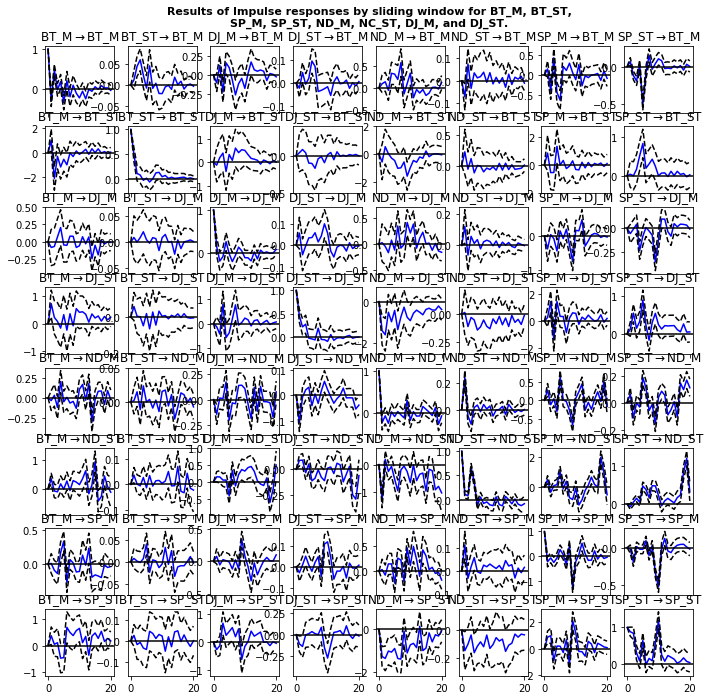

In [79]:
irf = result.irf(20)
irf.plot(orth=False)
plt.suptitle("Results of Impulse responses by sliding window for BT_M, BT_ST,\nSP_M, SP_ST, ND_M, NC_ST, DJ_M, and DJ_ST.", fontsize=11, fontweight='bold')
plt.savefig(r"D:\fig4.tiff", dpi = 300)
plt.show()

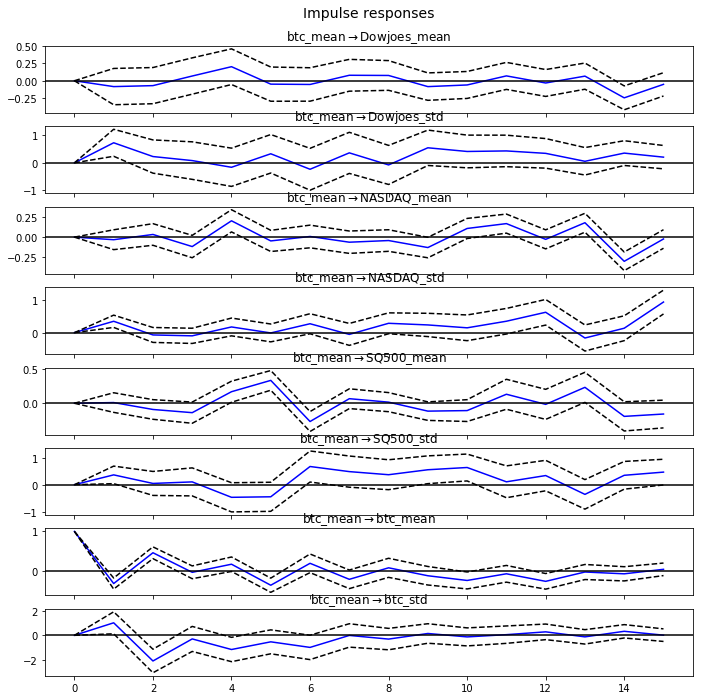

In [19]:
irf.plot(impulse='btc_mean')
plt.show()

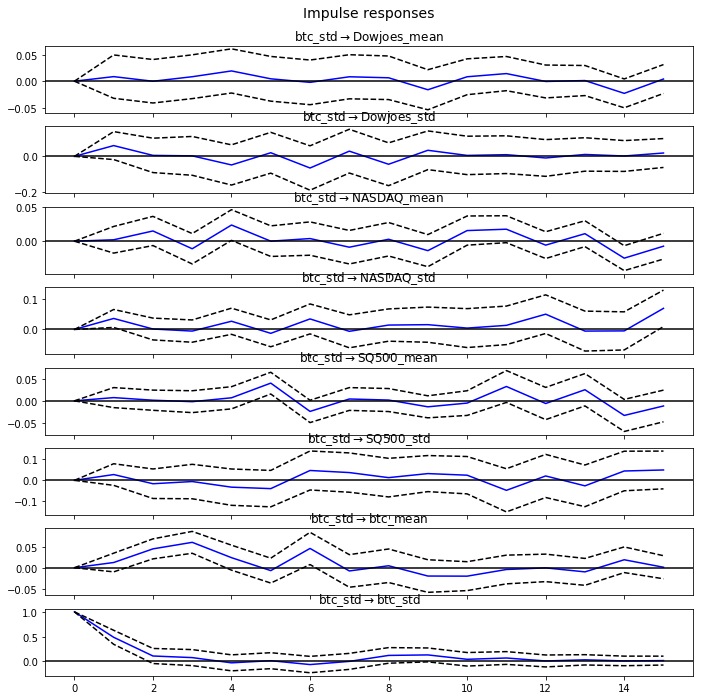

In [20]:
irf.plot(impulse='btc_std')
plt.show()

# Forcast Error Variance Decomposition (FEVD)

In [22]:
fevd = result.fevd(110)
fevd.summary()

FEVD for BT_M
           BT_M     BT_ST      DJ_M     DJ_ST      ND_M     ND_ST      SP_M     SP_ST
0      1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1      0.962996  0.003269  0.000002  0.000598  0.011454  0.003979  0.000983  0.016719
2      0.869261  0.046030  0.000009  0.001130  0.010177  0.005099  0.012469  0.055826
3      0.698050  0.071862  0.000297  0.006632  0.015223  0.003836  0.080897  0.123201
4      0.662575  0.079360  0.007156  0.006631  0.017157  0.003622  0.106444  0.117055
5      0.438256  0.049062  0.004679  0.014075  0.012846  0.002882  0.066023  0.412177
6      0.413254  0.057179  0.009191  0.027367  0.021694  0.003165  0.071100  0.397049
7      0.394001  0.053552  0.009172  0.025668  0.053704  0.003764  0.066395  0.393743
8      0.389680  0.052885  0.009066  0.026986  0.053038  0.003799  0.074487  0.390058
9      0.387313  0.055650  0.009459  0.026854  0.053602  0.004360  0.073895  0.388868
10     0.375929  0.054607  0.022330  0.0

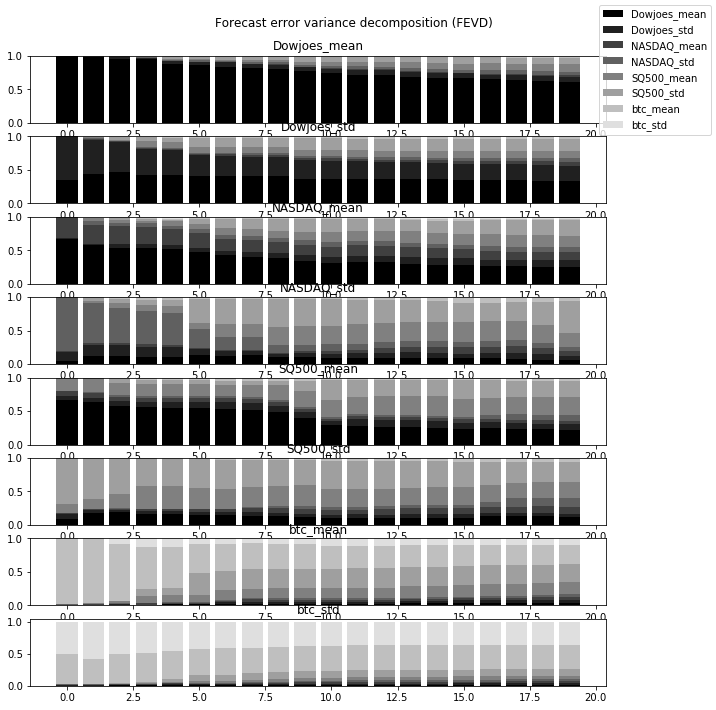

In [22]:
results.fevd(20).plot()
plt.show()

# 7

In [23]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()
group_label = []
end_boundary = 0 + 7
label = 1
for i in range(0,len(list(data.index))):
    if i < end_boundary:
        group_label.append(label)
    else:
        end_boundary += 7
        label += 1
        group_label.append(label)

        
new_data = data
new_data['group label'] = group_label

grouped = new_data.groupby('group label')
m = grouped.agg([np.mean, np.std])

m = m.replace([np.inf, -np.inf], np.nan).dropna()

mdata = pd.DataFrame({'SQ500_mean': m['SQ500']['mean'], 'SQ500_std': m['SQ500']['std'],
                      'NASDAQ_mean': m['NASDAQ']['mean'], 'NASDAQ_std': m['NASDAQ']['std'],
                      'Dowjoes_mean': m['Dowjoes']['mean'], 'Dowjoes_std': m['Dowjoes']['std'],
                     'btc_mean': m['Bitcoin']['mean'], 'btc_std': m['Bitcoin']['std']})

# print all windows
print(mdata.index)

# convert group label to datetime index
mdata.index = pd.to_datetime(mdata.index)

#m = m.set_index('group label')
model_1 = VAR(mdata)

# Lag order selection

model_1.select_order(20)
results = model_1.fit(maxlags=20, ic='aic')
lag_order = results.k_ar

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            273, 274, 275, 276, 277, 278, 279, 280, 281, 282],
           dtype='int64', name='group label', length=282)
                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -38.05       -37.94    2.975e-17       -38.01
1        -42.40       -41.42    3.870e-19       -42.00
2        -43.50       -41.65    1.286e-19       -42.75
3        -44.75       -42.03    3.689e-20       -43.66
4        -45.80       -42.20    1.306e-20       -44.35
5        -46.66       -42.19    5.573e-21       -44.86
6        -49.22      -43.88*    4.381e-22       -47.07
7        -49.68       -43.46    2.823e-22       -47.18
8        -50.18       -43.10    1.758e-22       -47.33
9        -50.34       -42.38    1.554e-22       -47.14
10       -50.39       -41.56    1.543e-22       -46.84
11       -50.31       -40.61   

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [24]:
# From BIC, we can choose the lag order to be 9
# Impulse Response Analysis

result = model_1.fit(6)
# print summary for each variable
result.summary()

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Jul, 2018
Time:                     12:20:03
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -44.6088
Nobs:                     276.000    HQIC:                  -47.6875
Log likelihood:           4124.60    FPE:                2.55085e-22
AIC:                     -49.7509    Det(Omega_mle):     6.90067e-23
--------------------------------------------------------------------
Results for equation Dowjoes_mean
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.001446         0.005735           -0.252           0.801
L1.Dowjoes_mean        -0.094859         0.136160           -0.697           0.487
L1.Dowjoes_std          0.143876         0.05

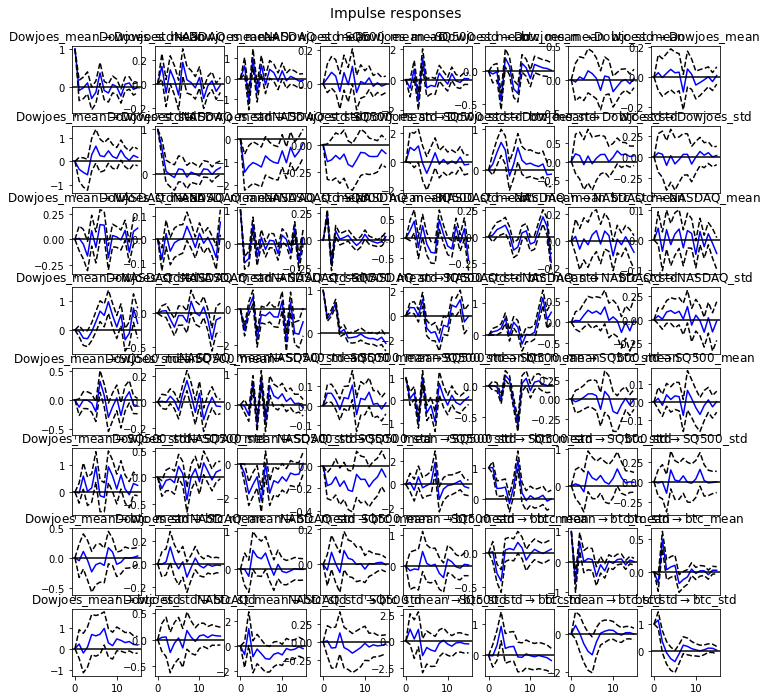

In [25]:
irf = result.irf(15)
irf.plot(orth=False)
plt.show()

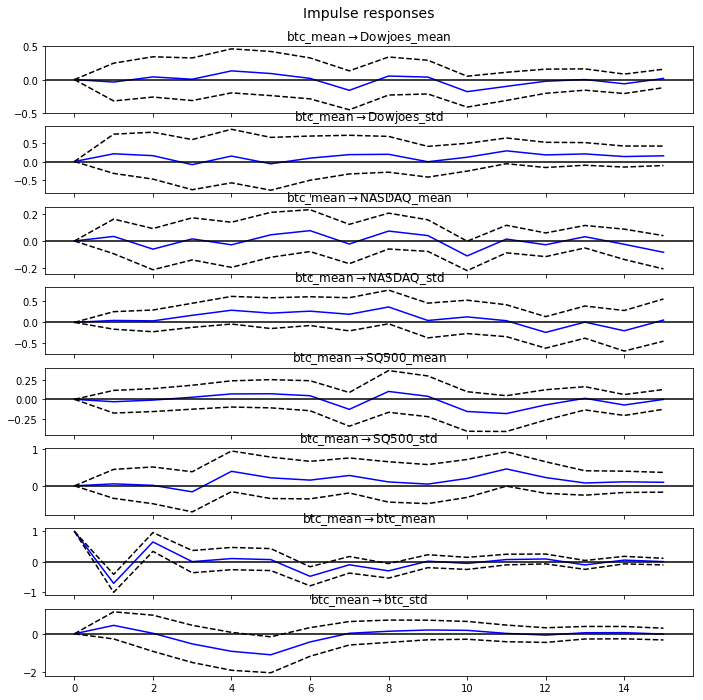

In [26]:
irf.plot(impulse='btc_mean')
plt.show()

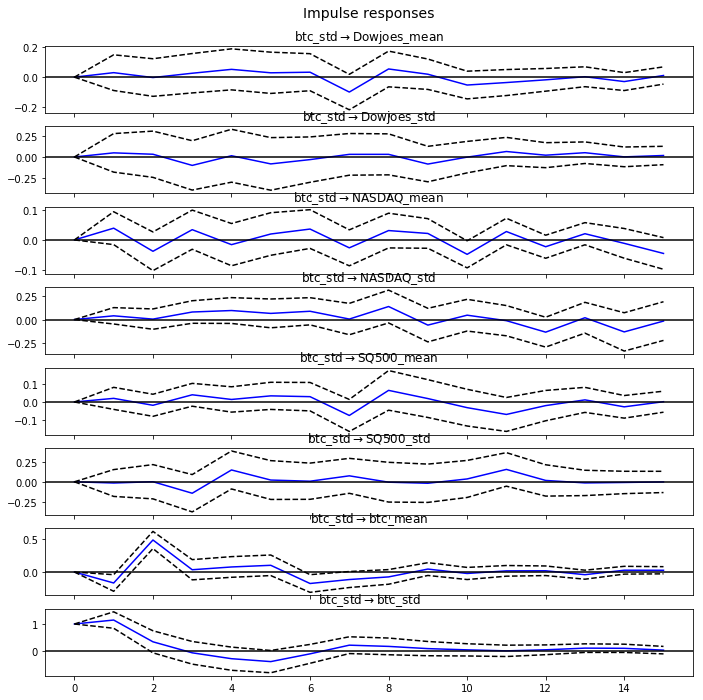

In [27]:
irf.plot(impulse='btc_std')
plt.show()

# FEVD

In [28]:
fevd = result.fevd(10)
fevd.summary()

FEVD for Dowjoes_mean
     Dowjoes_mean  Dowjoes_std  NASDAQ_mean  NASDAQ_std  SQ500_mean  SQ500_std  btc_mean   btc_std
0        1.000000     0.000000     0.000000    0.000000    0.000000   0.000000  0.000000  0.000000
1        0.940436     0.022124     0.017165    0.000003    0.009002   0.000731  0.009706  0.000833
2        0.840292     0.020571     0.096375    0.003814    0.027240   0.000680  0.010282  0.000745
3        0.729850     0.024423     0.101722    0.004072    0.023531   0.104440  0.010833  0.001129
4        0.682359     0.047415     0.095804    0.004296    0.039214   0.117815  0.010252  0.002847
5        0.655821     0.053030     0.104241    0.004033    0.056711   0.112999  0.009981  0.003182
6        0.617869     0.059657     0.111554    0.003967    0.058242   0.134046  0.011062  0.003603
7        0.573429     0.060330     0.106545    0.005293    0.065394   0.168164  0.012208  0.008638
8        0.557346     0.060494     0.119689    0.005255    0.063558   0.169457  0.01425

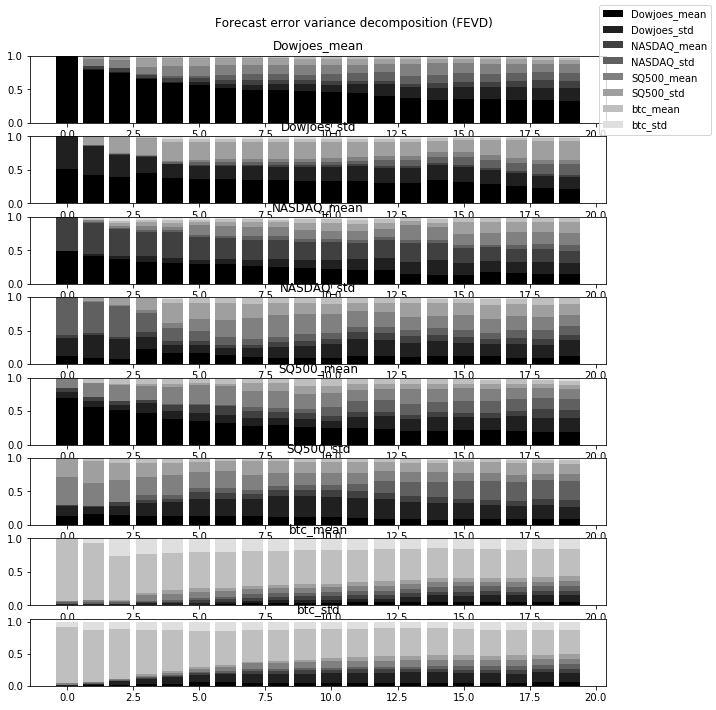

In [29]:
results.fevd(20).plot()
plt.show()

# 9

In [30]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()
group_label = []
end_boundary = 0 + 9
label = 1
for i in range(0,len(list(data.index))):
    if i < end_boundary:
        group_label.append(label)
    else:
        end_boundary += 9
        label += 1
        group_label.append(label)

        
new_data = data
new_data['group label'] = group_label

grouped = new_data.groupby('group label')
m = grouped.agg([np.mean, np.std])

m = m.replace([np.inf, -np.inf], np.nan).dropna()

mdata = pd.DataFrame({'SQ500_mean': m['SQ500']['mean'], 'SQ500_std': m['SQ500']['std'],
                      'NASDAQ_mean': m['NASDAQ']['mean'], 'NASDAQ_std': m['NASDAQ']['std'],
                      'Dowjoes_mean': m['Dowjoes']['mean'], 'Dowjoes_std': m['Dowjoes']['std'],
                     'btc_mean': m['Bitcoin']['mean'], 'btc_std': m['Bitcoin']['std']})

# print all windows
print(mdata.index)

# convert group label to datetime index
mdata.index = pd.to_datetime(mdata.index)

#m = m.set_index('group label')
model_1 = VAR(mdata)

# Lag order selection

model_1.select_order(20)
results = model_1.fit(maxlags=20, ic='aic')
lag_order = results.k_ar

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            210, 211, 212, 213, 214, 215, 216, 217, 218, 219],
           dtype='int64', name='group label', length=219)
                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -41.02       -40.89    1.533e-18       -40.97
1        -43.65       -42.46    1.103e-19       -43.17
2        -45.40       -43.15    1.932e-20       -44.49
3        -46.63       -43.32    5.661e-21       -45.29
4        -47.38       -43.01    2.709e-21       -45.61
5        -49.34       -43.91    3.922e-22       -47.14
6        -49.63       -43.14    3.038e-22       -47.00
7        -51.21       -43.67    6.532e-23       -48.16
8        -51.91       -43.31    3.473e-23       -48.43
9        -52.49       -42.83    2.124e-23       -48.58
10       -52.89       -42.17    1.596e-23       -48.55
11       -54.77       -42.99   

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [ ]:
# Here from the above summmary result, we cannot choose a best lag order number when windows number is equal to 9

In [31]:
# From BIC, we can choose the lag order to be 9
# Impulse Response Analysis

result = model_1.fit(20)
# print summary for each variable
result.summary()

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Jul, 2018
Time:                     12:22:45
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -46.6796
Nobs:                     199.000    HQIC:                  -59.3682
Log likelihood:           5794.56    FPE:                4.57540e-28
AIC:                     -67.9951    Det(Omega_mle):     3.98872e-30
--------------------------------------------------------------------
Results for equation Dowjoes_mean
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.011484         0.020419           -0.562           0.577
L1.Dowjoes_mean         -0.340451         0.628214           -0.542           0.591
L1.Dowjoes_std          -0.317510        

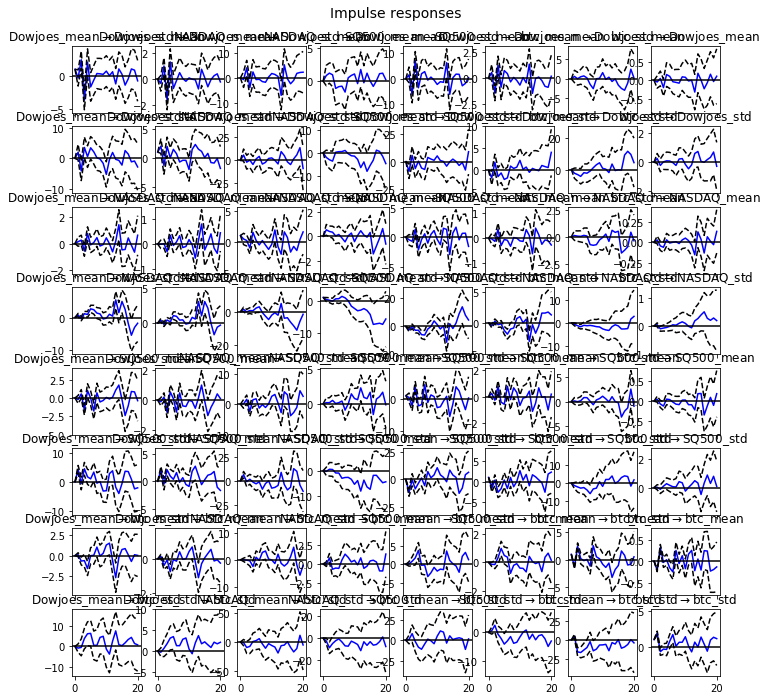

In [83]:
irf = result.irf(20)
irf.plot(orth=False)
plt.show()

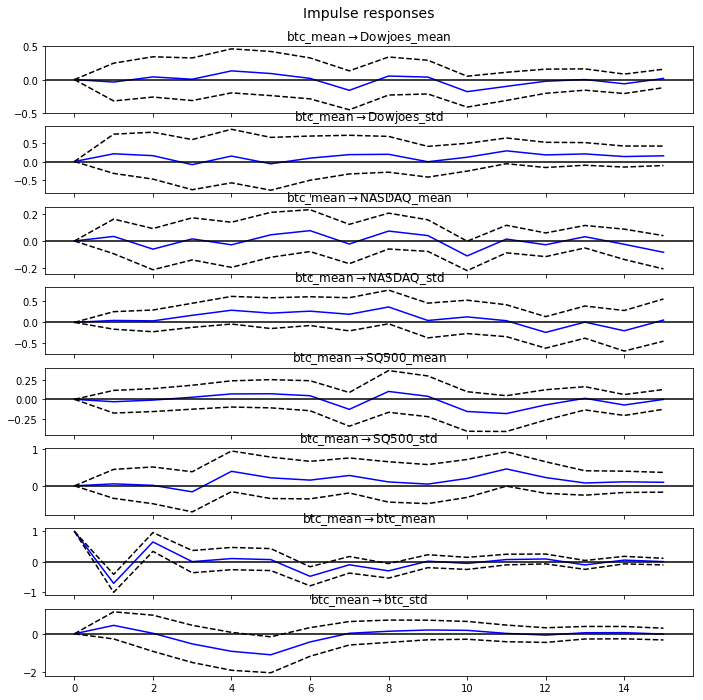

In [32]:
irf.plot(impulse='btc_mean')
plt.show()

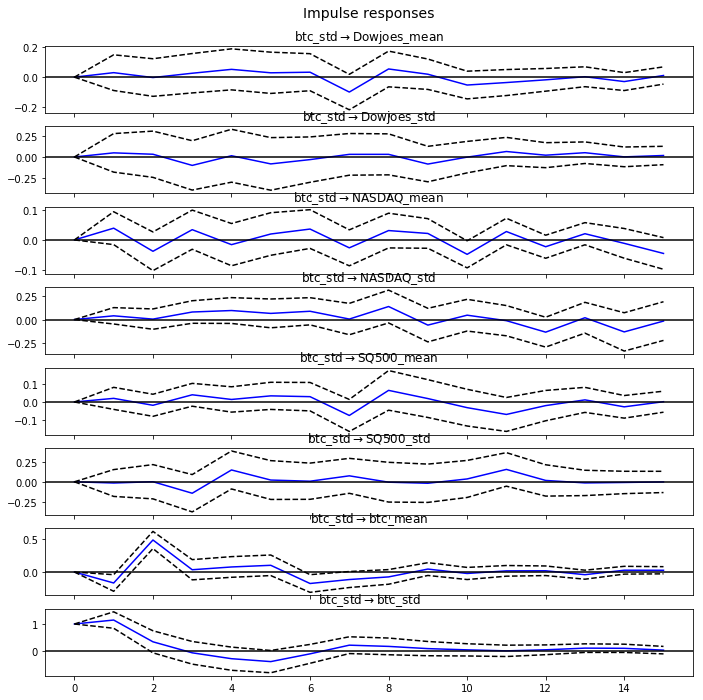

In [33]:
irf.plot(impulse='btc_std')
plt.show()